# Taxi Trip Duratoin

### Understanding Featrues/Data

This EDA for ***New York City Taxi Trip Duration*** project on kaggle to calculate the total duration for taxi driving in New York

* from Kaggle
***id*** - a unique identifier for each trip
  
***vendor_id*** - a code indicating the provider associated with the trip record  

***dropoff_datetime*** - date and time when the meter was disengaged  

***passenger_count*** - the number of passengers in the vehicle (driver entered value)  

***pickup_longitude*** - the longitude where the meter was engaged  

***pickup_latitude*** - the latitude where the meter was engaged  

***dropoff_longitude*** - the longitude where the meter was disengaged  

***dropoff_latitude*** - the latitude where the meter was disengaged  

***store_and_fwd_flag*** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip  

***trip_duration*** - duration of the trip in seconds

In [1]:
# import the required libraries

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [2]:
# load data

train_data = pd.read_csv(r'E:\ML_Live_Slides\HWs\Projects\New-York-City-Taxi-Trip-Duration\data\row\split/train.csv')
val_data = pd.read_csv(r'E:\ML_Live_Slides\HWs\Projects\New-York-City-Taxi-Trip-Duration\data\row\split/val.csv')

df = pd.concat([train_data,val_data], ignore_index=True)
df.shape

(1229319, 10)

In [3]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [4]:
df.drop('id',axis=1,inplace=True)
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1229319 non-null  int64  
 1   pickup_datetime     1229319 non-null  object 
 2   passenger_count     1229319 non-null  int64  
 3   pickup_longitude    1229319 non-null  float64
 4   pickup_latitude     1229319 non-null  float64
 5   dropoff_longitude   1229319 non-null  float64
 6   dropoff_latitude    1229319 non-null  float64
 7   store_and_fwd_flag  1229319 non-null  object 
 8   trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 84.4+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [7]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [8]:
numerical_data=[]

for col in df.columns:
    if df[col].dtype!='O':
        numerical_data.append(col)

df[numerical_data].skew()

vendor_id             -0.139992
passenger_count        2.128098
pickup_longitude    -369.522254
pickup_latitude        7.053077
dropoff_longitude   -376.640662
dropoff_latitude     -22.953668
trip_duration        359.513843
dtype: float64

In [9]:
print(df.isna().sum().sum())

0


In [10]:
df.duplicated().sum()

np.int64(6)

In [11]:
dub = df[df.duplicated()]
dub.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
315537,2,2016-05-04 14:54:59,4,-73.958336,40.800922,-73.959106,40.801910,N,149
446126,2,2016-03-05 18:22:41,2,-73.997292,40.691071,-73.999428,40.683388,N,149
625632,2,2016-01-21 12:04:53,3,-73.800667,40.645954,-73.985809,40.763363,N,5413
973226,2,2016-02-16 21:36:35,2,-74.008034,40.723553,-74.008034,40.723553,N,31
1022753,2,2016-03-06 10:06:31,4,-73.997055,40.737183,-73.991913,40.734577,N,85954


In [12]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

print(f"Input Features Shape : {X.shape}")
print(f"Target Feature shape : {Y.shape}")

Input Features Shape : (1229319, 8)
Target Feature shape : (1229319,)


In [13]:
Y_log = np.log1p(Y)
Y_log.skew()

np.float64(-0.2866252643273539)

In [14]:
df['log_trip_duration'] = Y_log
Y_log.head()

0    6.947937
1    6.719013
2    6.421622
3    6.766192
4    8.510773
Name: trip_duration, dtype: float64

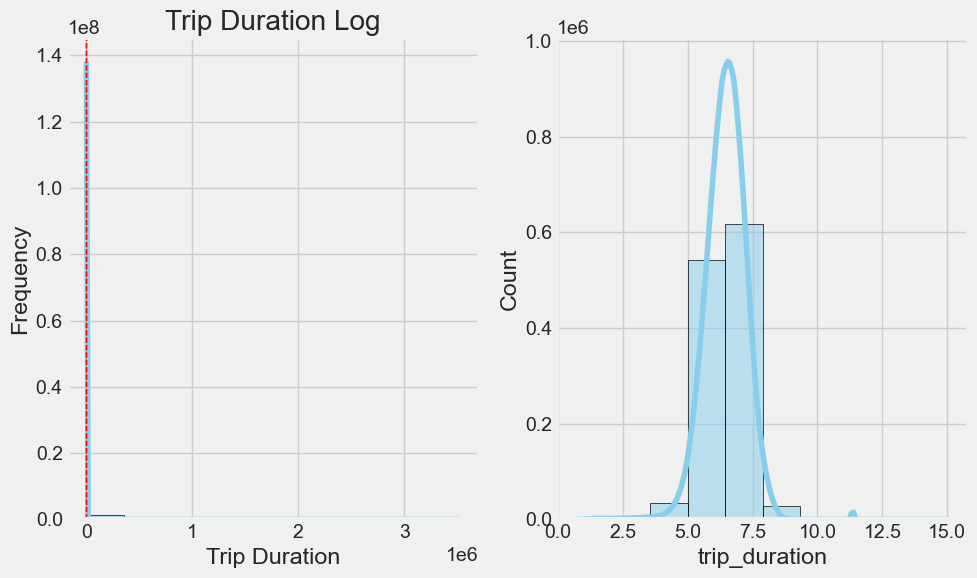

In [15]:
fig,axes = plt.subplots(1,2, figsize=(10,6))

sns.histplot(Y, kde=True, bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Trip Duration Origion")
axes[0].set_xlabel("Trip Duration")
axes[0].set_ylabel("Frequency")
axes[0].axvline(Y.mean(), color='red', linestyle='dashed',linewidth=1, label='Mean')

sns.histplot(Y_log, kde=True, bins=10, color='skyblue', edgecolor='black', ax=axes[1])
axes[0].set_title("Trip Duration Log")
axes[0].set_xlabel("Trip Duration")
axes[0].set_ylabel("Frequency")
axes[0].axvline(Y_log.mean(), color='red', linestyle='dashed',linewidth=1, label='Mean')


plt.tight_layout()
plt.show()

In [16]:
int_features, float_features = [], []

for col in X.columns:
    if X[col].dtype=='int64':
        int_features.append(col)
    if X[col].dtype=='float64':
        float_features.append(col)

print(X[int_features].shape)
print(X[float_features].shape)

(1229319, 2)
(1229319, 4)


In [17]:
X[int_features].head()

,vendor_id,passenger_count
0,2,1
1,2,1
2,2,5
3,2,2
4,1,4


In [18]:
X['vendor_id'].value_counts()

vendor_id
2    657578
1    571741
Name: count, dtype: int64

In [19]:
vendor_group = df.groupby('vendor_id')['trip_duration'].mean()
vendor_group =  vendor_group.reset_index()
vendor_group.head()

,vendor_id,trip_duration
0,1,844.111358
1,2,1060.184842


In [20]:
X['passenger_count'].value_counts()

passenger_count
1    871202
2    177073
5     65797
3     50470
6     40790
4     23932
0        51
7         3
8         1
Name: count, dtype: int64

In [21]:
passengers_group = df.groupby('passenger_count')['trip_duration'].mean()
passengers_group = passengers_group.reset_index()
passengers_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['trip_duration'])


,passenger_count,trip_duration
0,0,1966.980392
1,5,1068.808228
2,6,1065.369870
3,4,1057.735710
4,3,1035.417060
5,2,1008.754706
6,1,929.395889
7,8,104.000000
8,7,19.666667


C:\Users\AhmedDiab\AppData\Local\Temp\ipykernel_14308\2073454832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_group, x='vendor_id', y='trip_duration', palette='Reds', ax=axes[0])
C:\Users\AhmedDiab\AppData\Local\Temp\ipykernel_14308\2073454832.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=passengers_group, x='passenger_count',y='trip_duration', palette='Reds' , ax=axes[1])


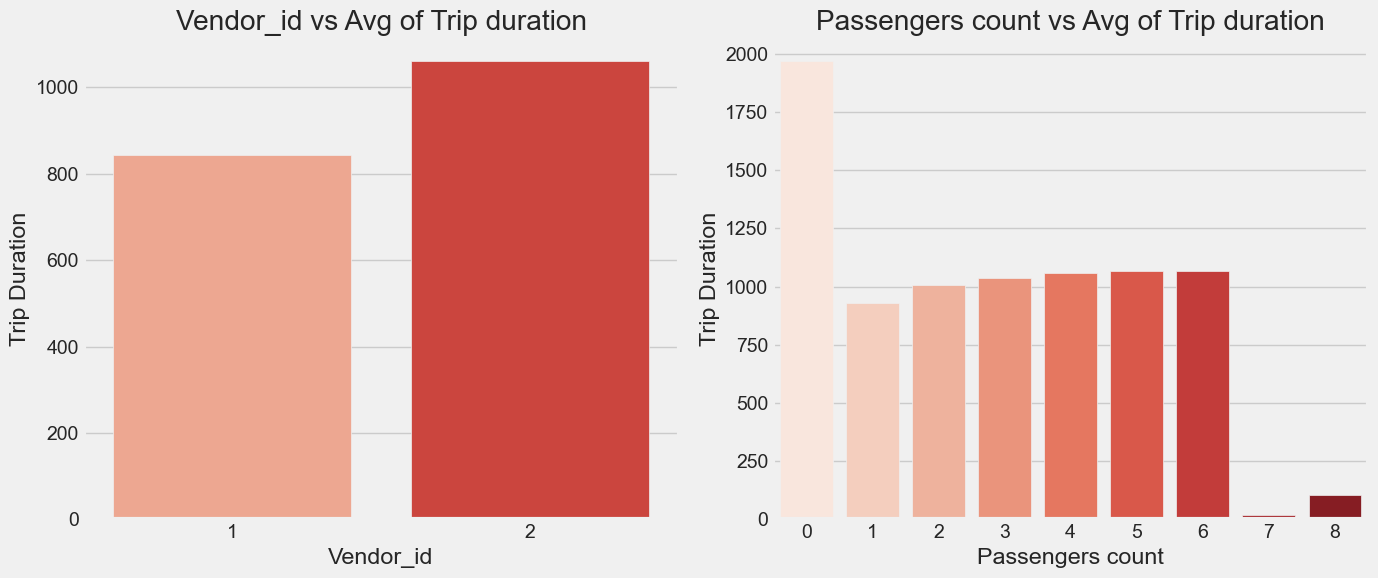

In [22]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.barplot(data=vendor_group, x='vendor_id', y='trip_duration', palette='Reds', ax=axes[0])
axes[0].set_title("Vendor_id vs Avg of Trip duration")
axes[0].set_xlabel("Vendor_id")
axes[0].set_ylabel("Trip Duration")

sns.barplot(data=passengers_group, x='passenger_count',y='trip_duration', palette='Reds' , ax=axes[1])
axes[1].set_title("Passengers count vs Avg of Trip duration")
axes[1].set_xlabel("Passengers count")
axes[1].set_ylabel("Trip Duration")


plt.tight_layout()
plt.show()


In [23]:
matrix = df[['vendor_id', 'passenger_count','log_trip_duration']]
matrix.head()

,vendor_id,passenger_count,log_trip_duration
0,2,1,6.947937
1,2,1,6.719013
2,2,5,6.421622
3,2,2,6.766192
4,1,4,8.510773


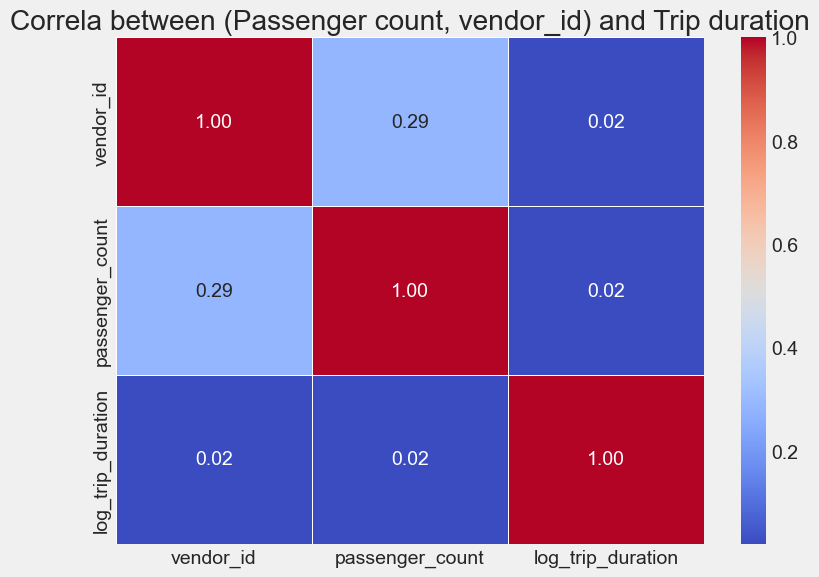

In [24]:
corr_matrix = matrix.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correla between (Passenger count, vendor_id) and Trip duration')
plt.tight_layout()
plt.show()

In [25]:
float_features

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [26]:
df[float_features].skew()

pickup_longitude    -369.522254
pickup_latitude        7.053077
dropoff_longitude   -376.640662
dropoff_latitude     -22.953668
dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = StandardScaler()

df[float_features] = mms.fit_transform(df[float_features])
df[float_features].skew()

pickup_longitude    -369.522254
pickup_latitude        7.053077
dropoff_longitude   -376.640662
dropoff_latitude     -22.953668
dtype: float64

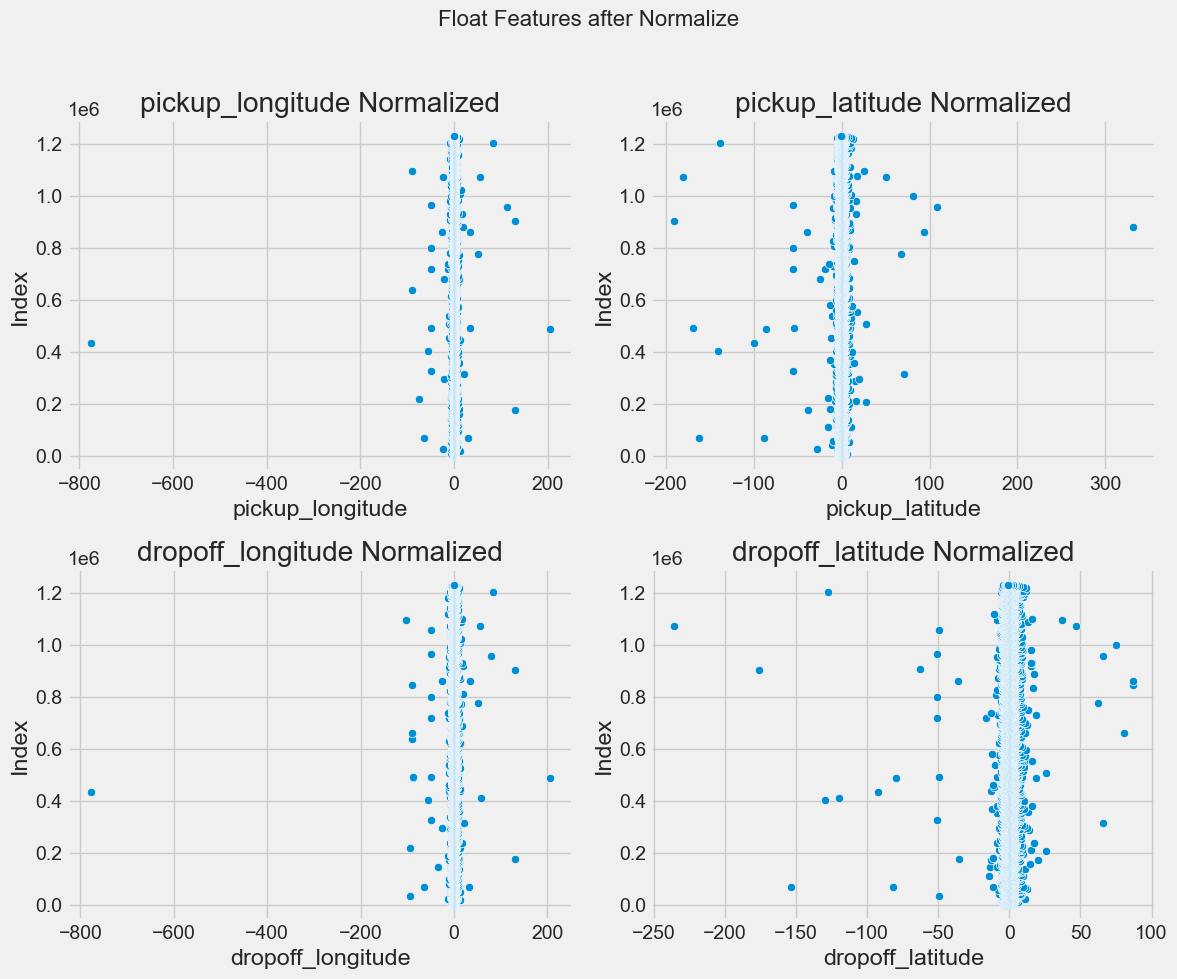

In [28]:
fig,axes = plt.subplots(2,2, figsize=(12,10))
lst_axes=[(0,0),(0,1),(1,0),(1,1)]
for i,feat in enumerate(float_features):
    r,c = lst_axes[i]
    sns.scatterplot(data=df,x=df[feat],y=df.index,ax=axes[r,c])
    axes[r,c].set_title(f'{feat} Normalized')
    axes[r,c].set_ylabel("Index")

plt.suptitle('Float Features after Normalize', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

as we have ***pickup_longitude***, ***pickup_latitude***, ***dropoff_longitude***, and ***dropoff_latitude***  
we can subtract ***pickup_latitude*** from ***dropoff_latitude*** and ***pickup_longitude*** from ***dropoff_longitude***   
we will get the the latitude&longitude from engased to disengaged the meter  

In [29]:
df['latitude'] = df['dropoff_latitude']-df['pickup_latitude']
df['latitude'].head()

0    0.684793
1   -0.454003
2    0.108975
3    0.510233
4    3.311953
Name: latitude, dtype: float64

In [30]:
df['longitude'] = df['dropoff_longitude']-df['pickup_longitude']
df['longitude'].head()

0    0.084376
1   -0.215631
2    0.252951
3   -0.016670
4   -3.200415
Name: longitude, dtype: float64

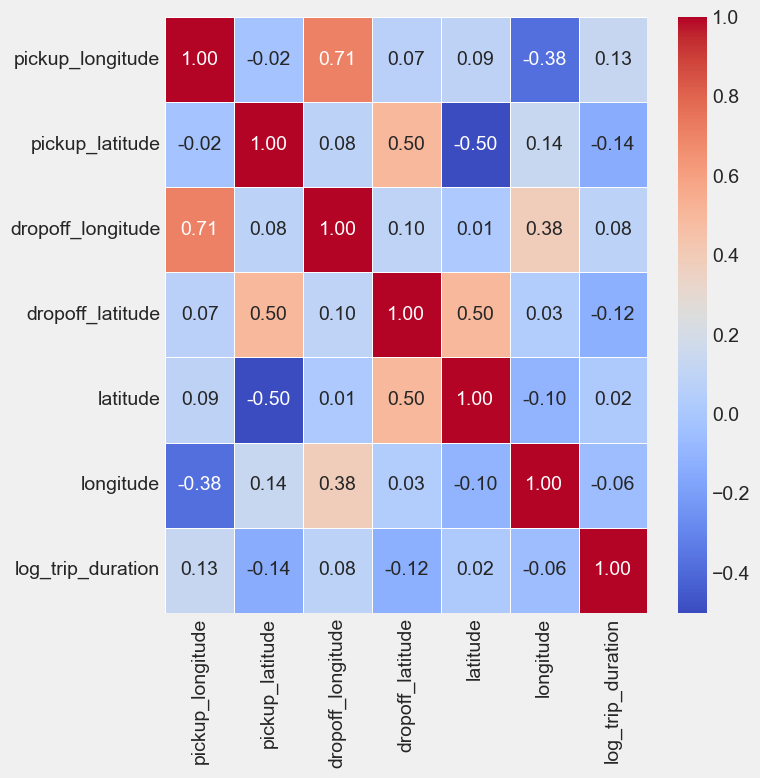

In [31]:
matrix = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','latitude','longitude','log_trip_duration']]
corr_matrix = matrix.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()


the longitude, latitude negatively affected over the origin features

In [32]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1222501
Y       6818
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder

feat = 'store_and_fwd_flag'

le = LabelEncoder()

df[feat] = le.fit_transform(df[feat])

df[feat].head()


0    0
1    0
2    0
3    0
4    0
Name: store_and_fwd_flag, dtype: int64

In [34]:
print(df[col].value_counts())
print()
store_fwd_group = df.groupby('store_and_fwd_flag')['trip_duration'].mean()
store_fwd_group = store_fwd_group.reset_index()

store_fwd_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

store_and_fwd_flag
0    1222501
1       6818
Name: count, dtype: int64



,store_and_fwd_flag,trip_duration
0,1,1075.719273
1,0,959.044652


although when the trip is not stored or forward is 197 times over when it stored  
the average of duration when stored is bigger than when not stored

In [36]:
df['pickup_datetime'].head(20)

0     2016-06-08 07:36:19
1     2016-04-03 12:58:11
2     2016-06-05 02:49:13
3     2016-05-05 17:18:27
4     2016-05-12 17:43:38
5     2016-04-14 12:17:42
6     2016-03-17 21:10:43
7     2016-02-05 06:43:21
8     2016-03-22 14:08:02
9     2016-03-29 23:32:47
10    2016-06-13 22:40:11
11    2016-02-02 08:10:25
12    2016-04-14 18:29:44
13    2016-02-21 02:02:26
14    2016-04-18 20:45:20
15    2016-02-14 08:32:03
16    2016-05-16 16:24:41
17    2016-03-12 19:13:40
18    2016-03-14 10:19:47
19    2016-06-17 00:54:50
Name: pickup_datetime, dtype: object

this column show the date and time when the taxi start driving

we can extract features from this feature like ***Day***, ***Month***, ***Year***, ***Hour***, ***Seasons***  
and see what effectness

In [60]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'].dtype

dtype('<M8[ns]')

In [98]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour


In [99]:
def getseason(month):
    if 4<=month<=7:
        return 'Sprint'
    elif 8<=month<=10:
        return 'Summar'
    elif 11<=month<=12:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['pickup_datetime'].dt.month.apply(getseason)
df['season'].head(10)

0    Sprint
1    Sprint
2    Sprint
3    Sprint
4    Sprint
5    Sprint
6    Winter
7    Winter
8    Winter
9    Winter
Name: season, dtype: object

In [105]:
dt_df = df[['year','month','day','hour','season']]
dt_df.head()


,year,month,day,hour,season
0,2016,6,8,7,Sprint
1,2016,4,3,12,Sprint
2,2016,6,5,2,Sprint
3,2016,5,5,17,Sprint
4,2016,5,12,17,Sprint


In [106]:
from sklearn.preprocessing import LabelEncoder

feat = 'season'

le = LabelEncoder()

df['season_encoder'] = le.fit_transform(df[feat])

df['season_encoder'].head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: season_encoder, dtype: int64

In [108]:
df['season_encoder'].value_counts()

season_encoder
0    618739
1    610580
Name: count, dtype: int64

In [115]:
df['year'].value_counts()

year
2016    1229319
Name: count, dtype: int64

the all data stored in 2016 so we can drop this feature

In [116]:
df.drop('year',axis=1,inplace=True)

In [ ]:
df['month'].value_counts()



print(df[col].value_counts())
print()
store_fwd_group = df.groupby('store_and_fwd_flag')['trip_duration'].mean()
store_fwd_group = store_fwd_group.reset_index()

store_fwd_group.sort_values(by='trip_duration', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

month
3    215991
4    211881
5    209516
2    201039
6    197342
1    193550
Name: count, dtype: int64

In [119]:
month_group = df.groupby('month')['trip_duration'].mean()
month_group = month_group.reset_index()

month_group.sort_values(by='trip_duration',ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds',subset=['trip_duration'])

,month,trip_duration
0,6,1012.918142
1,5,997.699827
2,4,965.411287
3,3,940.611743
4,2,921.748541
5,1,918.721498


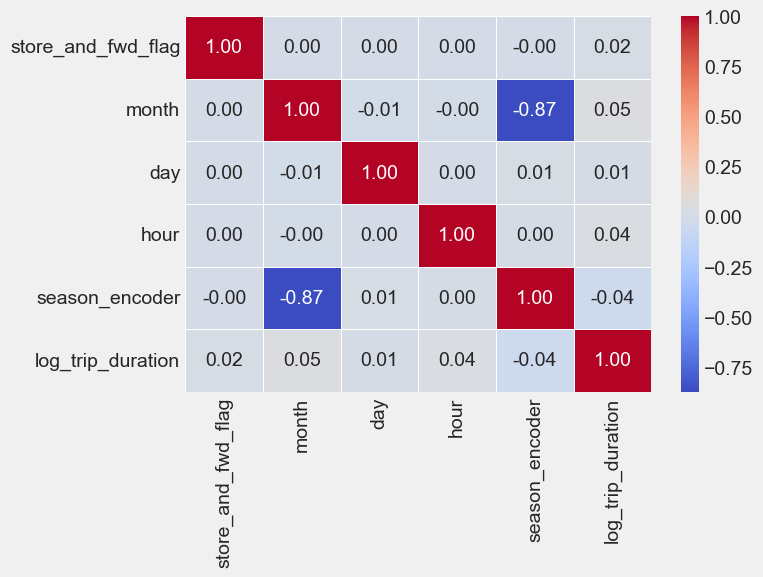

In [129]:
matrix = df[['store_and_fwd_flag','month','day','hour','season_encoder','log_trip_duration']]

corr_matrix = matrix.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = matrix.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()
